In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('C:/Users/prash/Desktop/python materials/python_data_projects/project_IPL_analysis/delivery.csv')
df_matches=pd.read_csv('C:/Users/prash/Desktop/python materials/python_data_projects/project_IPL_analysis/matches.csv')

Team wise IPL trophies

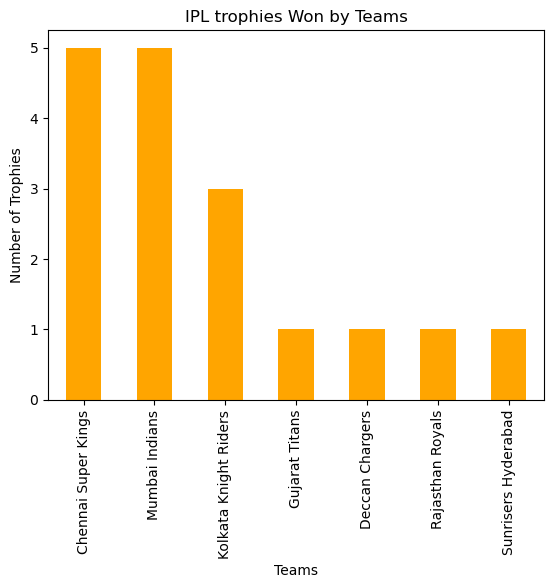

In [31]:
df_matches[df_matches['match_type']=='Final'].groupby('winner').size().sort_values(ascending=False).plot(kind='bar', color='orange')
df_winners = df_matches[df_matches['match_type']=='Final'].groupby('winner').size().sort_values(ascending=False)
plt.title('IPL trophies Won by Teams')
plt.xlabel('Teams')
plt.ylabel('Number of Trophies')
#plt.xticks(rotation=45)
plt.show()

Finals won chasing or batting first?

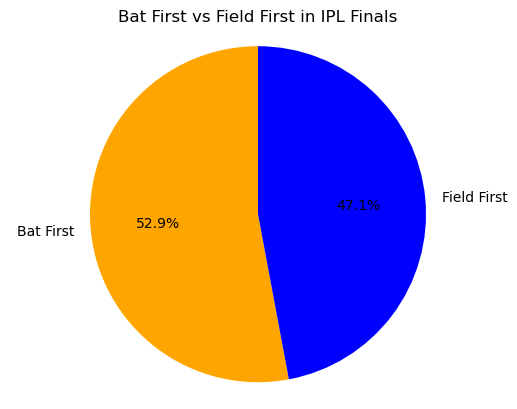

In [14]:
df_finals=df_matches[df_matches['match_type']=='Final']
batfirst=0
fieldfirst=0
for i in range(len(df_finals)):
    if df_finals['toss_winner'].iloc[i]==df_finals['winner'].iloc[i] and df_finals['toss_decision'].iloc[i]=='bat':
        batfirst+=1
    elif df_finals['toss_winner'].iloc[i]==df_finals['winner'].iloc[i] and df_finals['toss_decision'].iloc[i]=='field':
        fieldfirst+=1
    elif df_finals['toss_winner'].iloc[i]!=df_finals['winner'].iloc[i] and df_finals['toss_decision'].iloc[i]=='bat':
        fieldfirst+=1
    elif df_finals['toss_winner'].iloc[i]!=df_finals['winner'].iloc[i] and df_finals['toss_decision'].iloc[i]=='field':
        batfirst+=1

plt.pie([batfirst, fieldfirst], labels=['Bat First', 'Field First'], autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])
plt.title('Bat First vs Field First in IPL Finals')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Team reaching qualifier round most

In [ ]:
df_qualifiers=df_matches[df_matches['match_type'].str.contains('Qualifier',na=False)]
set1=df_qualifiers['team1'].value_counts().reset_index()
set1


,team1,count
0,Chennai Super Kings,6
1,Mumbai Indians,4
2,Delhi Capitals,4
3,Sunrisers Hyderabad,4
4,Royal Challengers Bangalore,3
5,Delhi Daredevils,2
6,Gujarat Lions,2
7,Kings XI Punjab,1
8,Rajasthan Royals,1
9,Gujarat Titans,1


In [23]:
set2=df_qualifiers['team2'].value_counts().reset_index()
set2.columns=['team1','countagain']
merged=set1.merge(set2, on='team1', how='outer')
merged.fillna(0,inplace=True)
merged['sum']=merged['countagain']+merged['count']
merged=merged.sort_values(by='sum', ascending=False)

In [30]:
merged.reset_index(drop='index')

,Team,Qualifiers Played
0,Chennai Super Kings,11.0
1,Mumbai Indians,9.0
2,Kolkata Knight Riders,6.0
3,Sunrisers Hyderabad,6.0
4,Delhi Capitals,5.0
5,Royal Challengers Bangalore,5.0
6,Rajasthan Royals,4.0
7,Gujarat Titans,3.0
8,Gujarat Lions,2.0
9,Delhi Daredevils,2.0


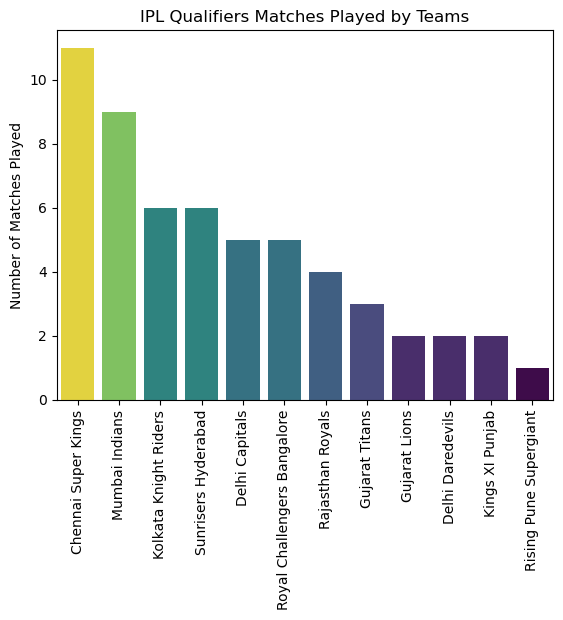

<Figure size 640x480 with 0 Axes>

In [37]:
sns.barplot(x='Team', y='Qualifiers Played', data=merged, palette='viridis',hue='Qualifiers Played')
plt.title('IPL Qualifiers Matches Played by Teams')
plt.xlabel('')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=90)
plt.legend().remove()
plt.show()
sns.despine()


In [4]:
df_matches

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
